In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% ! important; }<style>"))

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_14631/333272003.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
years = list(range(2000,2023))

In [3]:
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [4]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_ratings.html"

In [5]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("nba_stats_standing/{}.html".format(year),"w+") as f:
        f.write(data.text)

In [6]:
from bs4 import BeautifulSoup

In [7]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [8]:
dfs = []
for year in years:
    with open("nba_stats_standing/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    ratings_table = soup.find(id="ratings")
    ratings = pd.read_html(str(ratings_table))[0]
    ratings["Year"] = year
    
    dfs.append(ratings)

In [9]:
dfs

[    Rk                    Team Conf Div   W   L   W/L%    MOV    ORtg    DRtg  \
 0    1      Los Angeles Lakers    W   P  67  15  0.817   8.55  107.85   98.79   
 1    2  Portland Trail Blazers    W   P  59  23  0.720   6.40  108.75  101.67   
 2    3       San Antonio Spurs    W   M  53  29  0.646   5.94  105.83   99.45   
 3    4            Phoenix Suns    W   P  53  29  0.646   5.22  105.04   99.66   
 4    5               Utah Jazz    W   M  55  27  0.671   4.46  107.97  103.09   
 5    6          Indiana Pacers    E   C  56  26  0.683   4.60  109.17  104.21   
 6    7        Sacramento Kings    W   P  44  38  0.537   2.91  105.62  102.58   
 7    8  Minnesota Timberwolves    W   M  50  32  0.610   2.52  106.98  104.10   
 8    9              Miami Heat    E   A  52  30  0.634   3.11  105.39  102.08   
 9   10       Charlotte Hornets    E   C  49  33  0.598   2.67  105.00  102.22   
 10  11         New York Knicks    E   A  50  32  0.610   1.46  103.10  101.53   
 11  12         

In [10]:
nba_ratings = pd.concat(dfs)

In [11]:
nba_ratings.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [12]:
nba_ratings.to_csv("nba_ratings.csv")

In [13]:
url_start_2 = "https://www.basketball-reference.com/playoffs/"

In [14]:
import requests

data = requests.get(url_start_2)
with open("nba_champions/list.html","w+") as f :
    f.write(data.text)


In [15]:
dfs = []

with open("nba_champions/list.html") as f :
    page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    champs_table = soup.find(id="div_champions_index")
    champs = pd.read_html(str(champs_table))[0]
    
    dfs.append(champs)

nba_champs = pd.concat(dfs)
nba_champs.to_csv("nba_champs.csv")

In [16]:
nba_champs

,Year,Lg,Champion,Runner-Up,Finals MVP,Unnamed: 5,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,NaN,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,NaN,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,NaN,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,NaN,L. James (748),D. Green (222),L. James (198),L. James (5.2)
...,...,...,...,...,...,...,...,...,...,...
84,1951.0,NBA,Rochester Royals,New York Knicks,NaN,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
85,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
86,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
87,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [34]:
df = pd.read_csv('nba_ratings.csv')
df.set_index('Year', inplace = True)
df

,Unnamed: 0,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
Year,,,,,,,,,,,,,,,,
2000,0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92
2000,1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03
2000,2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37
2000,3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41
2000,4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,25,26,Detroit Pistons,E,C,23,59,0.280,-7.72,106.96,114.67,-7.71,-7.35,107.02,114.36,-7.34
2022,26,27,Orlando Magic,E,SE,22,60,0.268,-8.00,105.25,113.25,-8.00,-7.67,105.16,112.82,-7.66
2022,27,28,Oklahoma City Thunder,W,NW,24,58,0.293,-8.10,105.25,113.42,-8.18,-7.90,105.18,113.16,-7.98


In [28]:
df_champs = pd.read_csv('nba_champs.csv')
df_champs.drop(labels=["Unnamed: 0","Unnamed: 5"], axis=1, inplace = True)
df_champs

,Year,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
...,...,...,...,...,...,...,...,...,...
84,1951.0,NBA,Rochester Royals,New York Knicks,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
85,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
86,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
87,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [31]:
df_champs.set_index("Year", inplace = True)

In [32]:
df_champs = df_champs.loc[2022:2000]

In [33]:
df_champs

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [35]:
df_champs.dropna(how='all')

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [118]:
df_champs

,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
Year,,,,,,,,
2022.0,NBA,NaN,NaN,NaN,J. Tatum (486),G. Antetokounmpo (170),C. Paul (108),J. Butler (3.8)
2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)


In [36]:
df.drop(labels="Div", axis=1, inplace = True)
df_champs.drop(labels="Lg", axis=1, inplace = True)

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_14631/3632358297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs.drop(labels="Lg", axis=1, inplace = True)


In [37]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


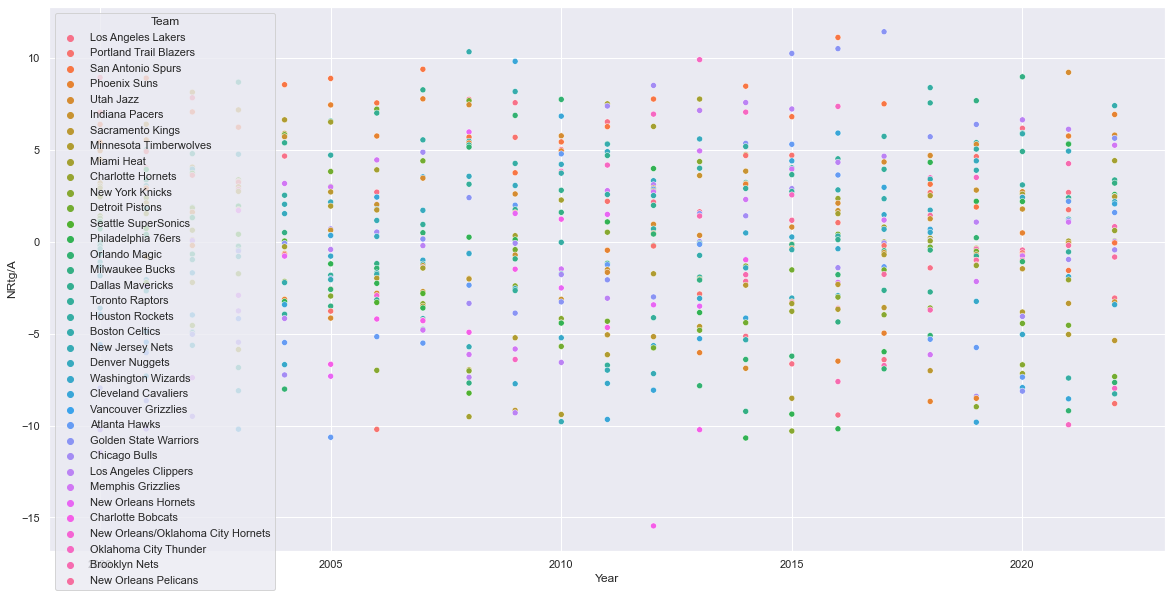

In [38]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale = 1)
fig = sns.scatterplot(data = df , x="Year", y="NRtg/A", hue = "Team")


In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [68]:
df_champs = df_champs[df_champs.index.notnull()]

In [110]:
df_champs["Year"] = df_champs.index.astype('int64')
df_champs.set_index("Year", inplace = True)


/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_14631/415462912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs["Year"] = df_champs.index.astype('int64')


In [87]:
df.sort_index(ascending=False)
df.drop(labels="Unnamed: 0", axis=1 , inplace = True)

In [115]:
df_champs.sort_index(inplace = True)

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_14631/581753011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_champs.sort_index(inplace = True)


In [422]:
df["Champion"] = " "
#champions_list = []
n = 0
c = 0
# y = 0
while df.index[n] == df_champs.index[c] :
    for x in df.loc[df.index[n] ,"Team"] :
        if (x == df_champs.loc[df_champs.index[c], "Champion"]) == True:
            df.loc[(df['Team'] == x), "Champion"].loc[df.index[n]] = "True"
            
        else : 
            df.loc[(df['Team'] == x), "Champion"].loc[df.index[n]] = "False"
  
    if df.index[n] < 2005: 
        n += 29
        c += 1
    elif df.index[n] >= 2005:
        n += 30
        c += 1
    if c == 23:
        break


In [430]:
df = df.iloc[: , :-1]
# df.loc[(df['Team'] == x) & (df['Rk'] == 1)]["Champions"]